In [14]:
import pandas as pd

df = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/processed_data copy.csv', index_col='id')
X = df.drop('trip_duration', axis =1)
y = df['trip_duration']

from sklearn.linear_model import Lasso
model = Lasso (alpha = 15)
model.fit(X, y)
model.coef_

X

,vendor_id,passenger_count,store_and_fwd_flag,distance_km
id,,,,
id2875421,1,930.399753,0,1.500479
id2377394,0,930.399753,0,1.807119
id3858529,1,930.399753,0,6.392080
id3504673,1,930.399753,0,1.487155
id2181028,1,930.399753,0,1.189925
...,...,...,...,...
id2376096,1,1053.529749,0,1.226296
id1049543,0,930.399753,0,6.056935
id2304944,1,930.399753,0,7.832952


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction = 'backward')
sfs.fit(X, y)

sfs.get_support()

array([ True, False, False,  True])

In [13]:
sfs.get_feature_names_out()
X[sfs.get_feature_names_out()]

,vendor_id,distance_km
id,,
id2875421,1,1.500479
id2377394,0,1.807119
id3858529,1,6.392080
id3504673,1,1.487155
id2181028,1,1.189925
...,...,...
id2376096,1,1.226296
id1049543,0,6.056935
id2304944,1,7.832952


In [16]:
pd.concat ((X,y), axis =1).corr() 

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,trip_duration
vendor_id,1.000000,0.258422,-0.079872,0.008107,0.020304
passenger_count,0.258422,1.000000,-0.018487,0.016596,0.009151
store_and_fwd_flag,-0.079872,-0.018487,1.000000,0.026275,0.001724
distance_km,0.008107,0.016596,0.026275,1.000000,0.094818
trip_duration,0.020304,0.009151,0.001724,0.094818,1.000000


<Axes: ylabel='id'>

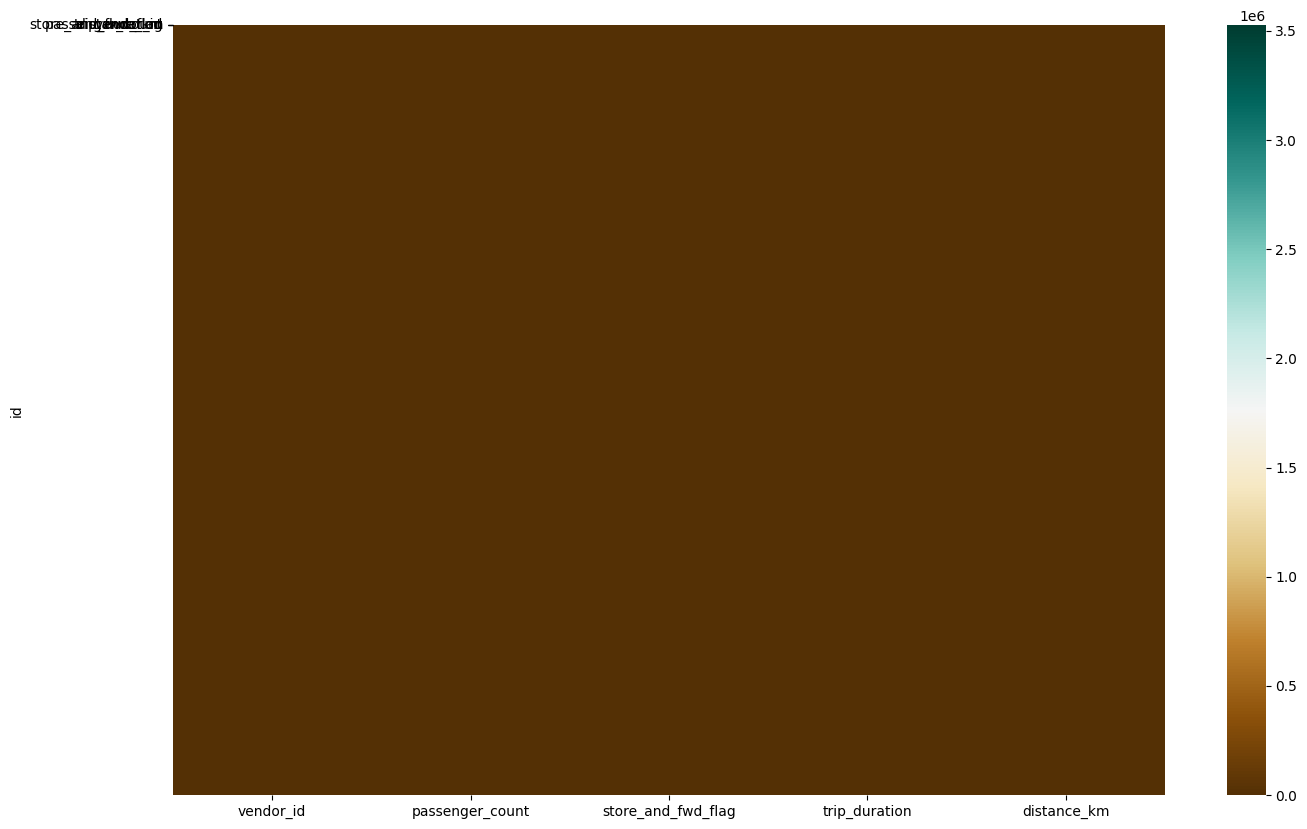

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure()
fig.set_size_inches(16,10)

sns.heatmap(df, xticklabels = df.columns, yticklabels = df.columns, cmap ='BrBG')

In [22]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=1)
variance.fit(X)
variance.get_feature_names_out()

array(['passenger_count', 'distance_km'], dtype=object)